# 02 Computational Representations of (Biomedical) Shapes

## A) Shapes of Curves

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>


# Outline: Geometric Learning for BioShape Analysis

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=500px alt="default"/></center>

Examples and applications will be taken from cutting-edge research in the **biomedical field**.

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - **B) Shapes of curves**
    - Motivation: Shape of Cancer Treatments
    - Practice: Analysis with SRV
    - Theory: Geometry of SRV manifolds
    - Application: Osteoscarcoma cells
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

## Motivation: Shape of Cancer Treatments

### Cell Shapes, aka Cell Morphologies

Biological cells adopt a variety of shapes, determined by multiple processes and biophysical forces under the control of the cell. With the emergence of large-scale biological cell image data, morphological studies, i.e. studies of cell shapes, have many applications. 

$\color{#047C91}{\text{Example}}$: Measures of irregularity of cells can discriminate between cancer cell lines treated with different drugs.

<center><img src="figs/02_cells.png" width=400px alt="default"/></center>
<center>Cell images obtained by fluorescence microscopy, provided by A. Prasad, Colorado State University. </center>
<center> The cells nuclei (blue), the actin cytoskeleton (green) and the lipid membrane (red) of each cell are stained and colored. </center>

### A Closer Look: Actin

$\color{#EF5645}{\text{Remark}}$: "Actin" plays a crucial role in determining the shape of a cell. Conversely, shapes of cell can give us insights about the function of actin in the cell.

$\color{#EF5645}{\text{Definition}}$: Actin is a family of globular multi-functional proteins that form microfilaments in the cytoskeleton. They participate in important cellular processes, including muscle contraction, cell motility, cell division and cytokinesis, vesicle and organelle movement, cell signaling, and the establishment and maintenance of cell junctions and **cell shape**.

<center><img src="figs/02_actin.jpeg" width=300px alt="default"/></center>
<center>Human Lung Carcinoma Cells (A-549) - https://tinyurl.com/2p8axfxe</center>


### Question

$\color{#EF5645}{\text{Question}}$: Do specific cancer treatments affect the inner health of the cell, and specifically its actin and cytoskeleton?


Images of mouse osteosarcoma cells (bone cancer cells) acquired by fluorescence microscopy
- 2 cell lines (i.e. cultures of cells): DUNN and DLM8 (more aggressive)
- 3 states: 1 control group, and 2 cancer treatments: Jasplakinolide (jasp) and cytochalasin D (cytd).

$\rightarrow$ On each image, the boundary of the cell was segmented (ECE 278a) to form a discrete closed curve.


<center><img src="figs/02_binarized_cells.png" width=400px alt="default"/></center>
<center>Segmented cell images from which the boundary can be extracted.</center>



### Load the Dataset

In [11]:
import geomstats.datasets.utils as data_utils

cells, lines, treatments = data_utils.load_cells()
print(f"Total number of cells : {len(cells)}")
print(f"The array contained the 0th cell has shape {cells[0].shape}.")

Total number of cells : 650
The array contained the 0th cell has shape (210, 2).


In [4]:
import numpy as np
import pandas as pd

TREATMENTS = np.unique(treatments); print(TREATMENTS)
LINES = np.unique(lines); print(LINES)


['control' 'cytd' 'jasp']
['dlm8' 'dunn']


In [8]:
ds = {}; n_cells_arr = np.zeros((3, 2))
for i, treatment in enumerate(TREATMENTS):
    ds[treatment] = {}
    for j, line in enumerate(LINES):
        to_keep = np.array(
            [
                one_treatment == treatment and one_line == line
                for one_treatment, one_line in zip(treatments, lines)
            ]
        )
        ds[treatment][line] = [
            cell_i for cell_i, to_keep_i in zip(cells, to_keep) if to_keep_i
        ]
        nb = len(ds[treatment][line])
        n_cells_arr[i, j] = nb

n_cells_df = pd.DataFrame({"dlm8": n_cells_arr[:, 0], "dunn": n_cells_arr[:, 1]}); n_cells_df = n_cells_df.set_index(TREATMENTS)
display(n_cells_df)

,dlm8,dunn
control,114.0,204.0
cytd,82.0,93.0
jasp,62.0,95.0


### Difference: Landmarks and Curves

Landmarks:
- are "biologically meaningful loci": cannot be permuted.

Curves:
- are made of points that are discretizing a continuous curve: the discretization is not biologically meaningful.

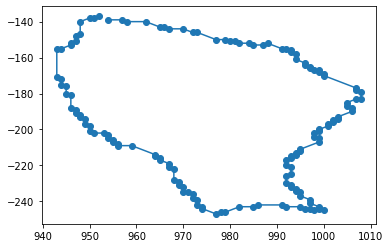

In [27]:
import matplotlib.pyplot as plt
plt.plot(cells[1][:, 0], cells[1][:, 1], "C0", marker="o");

### From Curves to Shapes of Curves

$\color{#EF5645}{\text{Definition}}$: Two curves are said to have the same shape if one set can be obtained by translating, rotating, re-scaling, or reparameterizing the other.

$\rightarrow$ We do not want to do machine learning on the curves directly, but rather on the shapes of these curves.

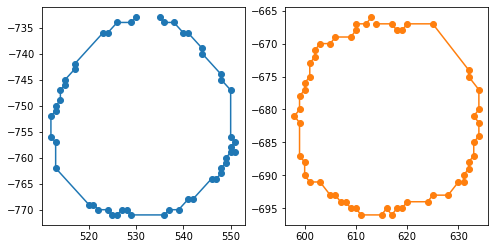

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(cells[2][:, 0], cells[2][:, 1], "C0", marker="o"); axes[1].plot(cells[3][:, 0], cells[3][:, 1], "C1", marker="o");

## Practice: Analysis in SRV space

## Theory: SRV Manifolds

## Application: Understanding Cancer Treatments

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - **A) Shapes of landmarks**
    - Motivation: Shape of Glaucoma
    - Practice: Procrustes Analysis
    - Theory: Kendall Shape Spaces
    - Application: Innovation in Pelvis Surgery
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations
  
Questions?